In [66]:
%run kp00_load_packages.ipynb

In [67]:
pd.set_option('display.max_rows', 500)
import keras
from sklearn.metrics import r2_score
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from keras import regularizers
from sklearn import metrics
from keras.layers import LeakyReLU

In [68]:
GFPs

['amacGFP', 'cgreGFP', 'ppluGFP']

In [69]:
# Select GFP used in subsequent analysis (SELECTED_GFP)
# this notebook is called by other notebooks
# so SELECTED_GFP is not instanciated here
print(SELECTED_GFP)

ppluGFP


In [70]:
df = pd.read_csv('3_data/ranked_sequences.csv', index_col=0)
df = df[df.gene==SELECTED_GFP]
#df = df.groupby('aa_sequence')[['log_brightness']].agg(np.median).reset_index()
df=df.reset_index(drop=True)
df=df[["aa_sequence","aa_mutations_pseudo","log_brightness"]]
df.columns = ['sequences',"aa_mutations_pseudo",'labels']

Text(0, 0.5, 'N sequences')

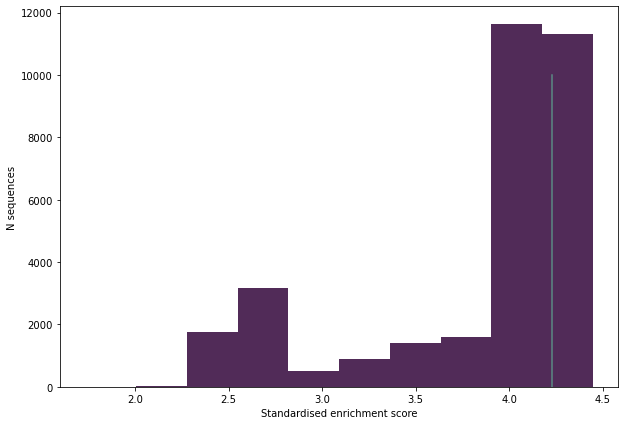

In [71]:
wt_score = float(df[df.sequences==WT_SEQs[SELECTED_GFP]].labels)

plt.figure(figsize=[10,7])
plt.hist(df.labels)
plt.plot([wt_score]*2, [0,10000])
plt.xlabel('Standardised enrichment score')
plt.ylabel('N sequences')

In [72]:
sequences = list(df.sequences)
print(f'Number of sequences = {len(sequences)}')

Number of sequences = 32267


In [73]:
enc = preprocessing.OneHotEncoder(handle_unknown="ignore")
genotype_matrix = enc.fit_transform([list(sq) for sq in list(sequences)]).toarray()
labels = df.labels.values.reshape(-1,1)
# np.random.shuffle(labels)


In [74]:
from joblib import dump, load
dump(enc, f'4_ML/1_encoders/2D_encoder_{SELECTED_GFP}.joblib') 

['4_ML/1_encoders/2D_encoder_ppluGFP.joblib']